Topic: Challenge Set 8  
Subject: Classification Errors  
Date: 10/22/2018  
Name: Emma Huang

In [191]:
# libraries
import pandas as pd
import numpy as np

import io
import requests
import operator

from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.learning_curve import learning_curve
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [192]:
# Load the vote data into a dataframe
s=requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data").content
df=pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)

In [193]:
# Replace 'y's with 1s, 'n's with 0s
df.replace({'n': 0, 'y': 1},inplace=True)

In [194]:
# get counts of 0 & 1 for each column
counts = df.apply(pd.value_counts)
# make a list of probabilities
vote_probs = []
for item in range(1,17):
    vote_probs.append(counts[item][1]/(counts[item][1]+counts[item][0]))
# replace the "?"s with probabilities
for item in range(1,17):
    df[item].replace({'?': vote_probs[item-1]},inplace=True)

In [195]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [196]:
# Split the data into a test and training set
X=df.loc[:,df.columns != 0]
y=df[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=4444)

# Challenge 1

In [197]:
knn = KNeighborsClassifier(n_neighbors=10)
lm1 = LogisticRegression(C=1000)
Gaus = GaussianNB()
SVC = SVC()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
classifiers = [knn,lm1,Gaus,SVC,tree,rf]
names = ['knn','lm1','Gaus','SVC','tree','rf']

In [174]:
count = 0
for item in classifiers:
    item.fit(X_train, y_train)
    y_pred = item.predict(X_test)
    print(names[count])
    print("accuracy:" + str(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    print()
    print()
    count += 1

knn
accuracy:0.9312977099236641
             precision    recall  f1-score   support

   democrat       0.94      0.95      0.94        77
 republican       0.92      0.91      0.92        54

avg / total       0.93      0.93      0.93       131



lm1
accuracy:0.9312977099236641
             precision    recall  f1-score   support

   democrat       0.93      0.96      0.94        77
 republican       0.94      0.89      0.91        54

avg / total       0.93      0.93      0.93       131



Gaus
accuracy:0.9389312977099237
             precision    recall  f1-score   support

   democrat       0.92      0.99      0.95        77
 republican       0.98      0.87      0.92        54

avg / total       0.94      0.94      0.94       131



SVC
accuracy:0.9541984732824428
             precision    recall  f1-score   support

   democrat       0.95      0.97      0.96        77
 republican       0.96      0.93      0.94        54

avg / total       0.95      0.95      0.95       131



tre

# Challenge 2

In [175]:
y_test.replace({'democrat': 0, 'republican': 1},inplace=True)

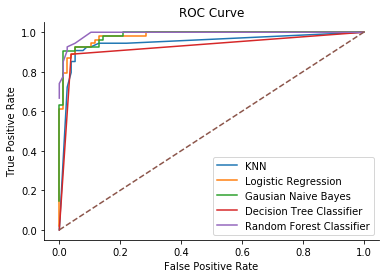

In [176]:
fpr1, tpr1, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr1, tpr1, label = "KNN")

fpr2, tpr2, _ = roc_curve(y_test, lm1.predict_proba(X_test)[:,1])
plt.plot(fpr2, tpr2, label = "Logistic Regression")

fpr3, tpr3, _ = roc_curve(y_test, Gaus.predict_proba(X_test)[:,1])
plt.plot(fpr3, tpr3, label = "Gausian Naive Bayes")

# fpr4, tpr4, _ = roc_curve(y_test, SVC.predict_proba(X_test)[:,1])
# plt.plot(fpr4, tpr4, label = "SVM")

fpr5, tpr5, _ = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
plt.plot(fpr5, tpr5, label = "Decision Tree Classifier")

fpr6, tpr6, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr6, tpr6, label = "Random Forest Classifier")

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
sns.despine();

In [155]:
auc_list = []
new_classifiers = [knn,lm1,Gaus,tree,rf]
for item in new_classifiers:
    auc_list.append(roc_auc_score(y_test, item.predict_proba(X_test)[:,1]))

In [156]:
auc_list

[0.9455266955266955,
 0.9812409812409812,
 0.9841269841269842,
 0.9342231842231842,
 0.9789562289562289]

# Challenge 3

In [200]:
y.replace({'democrat': 0, 'republican': 1},inplace=True)

In [201]:
cross_accuracy = []
cross_precision = []
cross_recall = []
cross_f1 = []
for item in classifiers:
    cross_accuracy.append(cross_val_score(item, X, y, cv=10).mean())
    cross_precision.append(cross_val_score(item, X, y, cv=10, scoring='precision').mean())
    cross_recall.append(cross_val_score(item, X, y, cv=10, scoring='recall').mean())
    cross_f1.append(cross_val_score(item, X, y, cv=10, scoring='f1').mean())

In [206]:
metrics = {}
metrics['Accuracy'] = cross_accuracy
metrics['Precision'] = cross_precision
metrics['Recall'] = cross_recall
metrics['F1'] = cross_f1

In [207]:
metrics

{'Accuracy': [0.9329029497634149,
  0.9560656397865699,
  0.9397739857042182,
  0.9582804792107119,
  0.9330690627202255,
  0.9513565891472868],
 'Precision': [0.9036366763611345,
  0.947561919504644,
  0.9259034227726177,
  0.934673202614379,
  0.9254179566563469,
  0.925576625386997],
 'Recall': [0.9338235294117647,
  0.9404411764705882,
  0.9220588235294118,
  0.9643382352941176,
  0.9408088235294118,
  0.9584558823529411],
 'F1': [0.9159213446262783,
  0.9426770072642938,
  0.922737989135048,
  0.9476298701298702,
  0.9197894661153674,
  0.9369423497649304]}

# Challenge 4

In [208]:
# Read in dataframe
movie_df = pd.read_csv('2013_movies.csv')
movie_df['ReleaseDate'] = pd.to_datetime(movie_df['ReleaseDate'])

In [209]:
# Replace budget Nones with the mean value
movie_df['Budget'].replace({None: 74747000},inplace=True)

In [210]:
# Split the data into a test and training set
Xmov=movie_df[['Budget','DomesticTotalGross','Runtime']]
ymov=movie_df['Rating']
Xmov_train, Xmov_test, ymov_train, ymov_test = train_test_split(Xmov, ymov, test_size=0.30,random_state=4444)

In [217]:
# KNN
knn_mov = KNeighborsClassifier(n_neighbors=3)
knn_mov.fit(Xmov_train, ymov_train)
y_pred = knn_mov.predict(Xmov_test)
print(classification_report(ymov_test, y_pred))

             precision    recall  f1-score   support

         PG       1.00      0.14      0.25         7
      PG-13       0.61      0.79      0.69        14
          R       0.55      0.67      0.60         9

avg / total       0.68      0.60      0.56        30



In [219]:
# LogisticRegression
log_mov = LogisticRegression(C=1000)
log_mov.fit(Xmov_train, ymov_train)
y_pred = log_mov.predict(Xmov_test)
print(classification_report(ymov_test, y_pred))

             precision    recall  f1-score   support

         PG       0.00      0.00      0.00         7
      PG-13       0.48      0.86      0.62        14
          R       0.40      0.22      0.29         9

avg / total       0.34      0.47      0.37        30



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Challenge 5
Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [231]:
# Load the cancer data into a dataframe
s = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data").content
cancerdf = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)

In [232]:
Xcan=cancerdf[[0,1,2]]
ycan=cancerdf[3]
Xcan_train, Xcan_test, ycan_train, ycan_test = train_test_split(Xcan, ycan, test_size=0.30,random_state=4444)

In [233]:
log_can = LogisticRegression(C=1000)
log_can.fit(Xcan_train, ycan_train)
ycan_test.replace({1: 0, 2: 1},inplace=True)

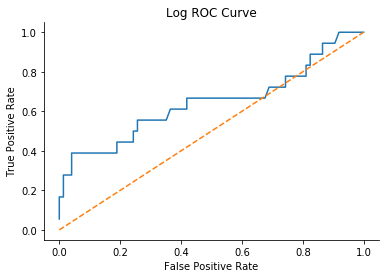

In [235]:
fpr, tpr, _ = roc_curve(ycan_test, log_can.predict_proba(Xcan_test)[:,1])
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('Log ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.despine();

In [236]:
roc_auc_score(ycan_test, log_can.predict_proba(Xcan_test)[:,1])

0.6437687687687689

This is a pretty terrible ROC and AUC